In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
data = communities_and_crime.data.features 
y = communities_and_crime.data.targets 
  
# metadata 
# print(communities_and_crime.metadata) 
  
# variable information 
print(communities_and_crime.variables) 

                    name     role         type demographic description units  \
0                  state  Feature      Integer        None        None  None   
1                 county  Feature      Integer        None        None  None   
2              community  Feature      Integer        None        None  None   
3          communityname  Feature  Categorical        None        None  None   
4                   fold  Feature      Integer        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
123  LemasPctPolicOnPatr  Feature   Continuous        None        None  None   
124  LemasGangUnitDeploy  Feature      Integer        None        None  None   
125  LemasPctOfficDrugUn  Feature      Integer        None        None  None   
126      PolicBudgPerPop  Feature      Integer        None        None  None   
127  ViolentCrimesPerPop   Target   Continuous        None        None  None   

    missing_values  
0               no

In [2]:
# Remove features containing missing values, except 'state'
data = data.drop(data.loc[:, data.columns != 'state'].columns[data.loc[:, data.columns != 'state'].eq('?').any()], axis=1)
data


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,6,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


In [3]:
X = data.drop(['state', 'communityname','fold'], axis=1)
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_standardised = scaler.fit_transform(X)

X_standardised

array([[-0.62, -0.34, -0.96, ..., -0.48, -0.6 , -0.36],
       [-1.  , -0.68, -0.76, ..., -0.76, -0.1 , -1.  ],
       [-1.  , -0.16, -0.02, ..., -0.58, -0.96, -1.  ],
       ...,
       [-0.68, -0.26, -0.5 , ..., -0.36, -0.64,  0.82],
       [-0.84,  0.02, -0.88, ..., -0.24, -0.34, -0.56],
       [-0.6 ,  0.56, -0.72, ..., -0.4 , -0.9 ,  1.  ]])

In [9]:
y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [12]:
for state, group in data.groupby('state'):
    print(f"State {state}:")
    i = 0
    for community in group['communityname']:
        print(community)
        i += 1
        if i == 5:
            break
    


State 1:
Cullmancity
Auburncity
Fairfieldcity
Huntsvillecity
Sheffieldcity
State 2:
Juneaucity
Anchoragecity
Fairbankscity
State 4:
CasaGrandecity
LakeHavasuCitycity
Tucsoncity
Nogalescity
Avondalecity
State 5:
WestMemphiscity
Paragouldcity
Jonesborocity
Russellvillecity
Stuttgartcity
State 6:
SouthPasadenacity
Selmacity
DalyCitycity
DanaPointcity
Modestocity
State 8:
Lakewoodcity
Goldencity
FortCollinscity
Littletoncity
Pueblocity
State 9:
EastHamptontown
Guilfordtown
Meridentown
Wolcotttown
Branfordtown
State 10:
Dovercity
State 11:
Washingtoncity
State 12:
Jacksonvillecity
KeyWestcity
Hollywoodcity
BoyntonBeachcity
OrmondBeachcity
State 13:
Savannahcity
Decaturcity
Daltoncity
Smyrnacity
Gainesvillecity
State 16:
Caldwellcity
Lewistoncity
Rexburgcity
Pocatellocity
TwinFallscity
State 18:
Valparaisocity
Evansvillecity
Kokomocity
Wabashcity
Scherervilletown
State 19:
FortDodgecity
SiouxCitycity
DesMoinescity
CedarFallscity
Amescity
State 20:
Wichitacity
State 21:
Hendersoncity
Georgeto

In [34]:
state_dict = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "DC",
    12: "Florida",
    13: "Georgia",
    16: "Idaho",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming"
}

In [35]:
import numpy as np

crime_dict = {}

for state, group in data.groupby('state'):
    i = np.array(data.loc[data['state'] == state].index)
    mean_crime = y.iloc[i].mean().item()
    crime_dict[state_dict[state]] = mean_crime

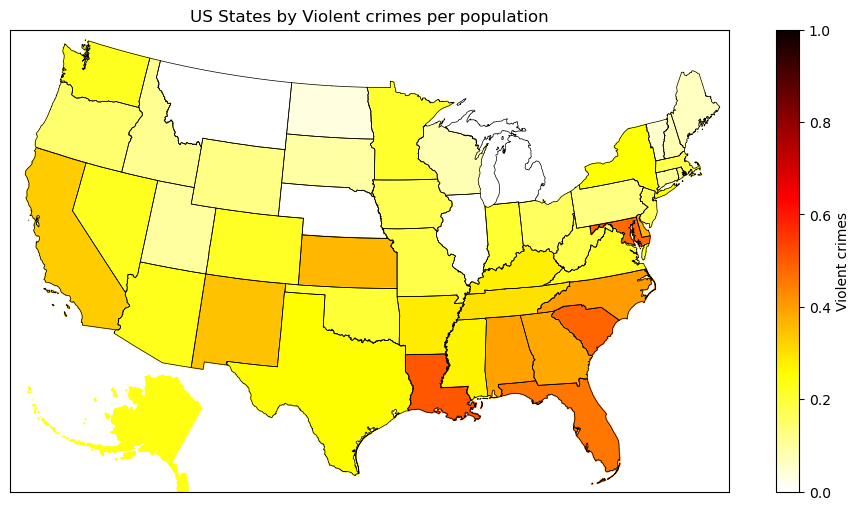

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize

plt.figure(figsize=(12,6))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'hot' colormap
vmin = 0; vmax = 1 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename in crime_dict.keys():
        crime = crime_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap((crime - vmin)/(vmax-vmin))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in crime_dict.keys():
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg = list(map(lambda coord: (0.35*coord[0] + 1100000, 0.35*coord[1]-1440000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

# Create a ScalarMappable object for colormap normalization
norm = Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Violent crimes')

plt.title('US States by Violent crimes per population')
plt.show()



In [157]:
crime_dict

{'Alabama': 0.3937209302325581,
 'Alaska': 0.24,
 'Arizona': 0.227,
 'Arkansas': 0.282,
 'California': 0.3304676258992806,
 'Colorado': 0.21720000000000003,
 'Connecticut': 0.10739130434782611,
 'Delaware': 0.37,
 'DC': 1.0,
 'Florida': 0.4583333333333333,
 'Georgia': 0.384054054054054,
 'Idaho': 0.11142857142857145,
 'Indiana': 0.205,
 'Iowa': 0.1685,
 'Kansas': 0.36,
 'Kentucky': 0.2811538461538462,
 'Louisiana': 0.5045454545454544,
 'Maine': 0.06294117647058824,
 'Maryland': 0.48,
 'Massachusetts': 0.18165289256198347,
 'Minnesota': 0.20714285714285716,
 'Mississippi': 0.2731578947368421,
 'Missouri': 0.18309523809523812,
 'Nevada': 0.22599999999999998,
 'New Hampshire': 0.07476190476190478,
 'New Jersey': 0.16061611374407583,
 'New Mexico': 0.34500000000000003,
 'New York': 0.25369565217391304,
 'North Carolina': 0.4019565217391305,
 'North Dakota': 0.035,
 'Ohio': 0.16348623853211006,
 'Oklahoma': 0.20138888888888892,
 'Oregon': 0.14741935483870966,
 'Pennsylvania': 0.128514851485